# Assignment 2
#CSE5NLP - Semester 1 - 2024

**Submission Deadline: 23.59pm (Melbourne time) on Sunday, 26 May 2024**

The assignment contains a total of three problems.

Write down your name and student ID below:

Name:

Student ID:

# **IMPORTANT INFORMATION**
**If you applied for special extensions or considerations, please provide the actual submission date and insert a screenshot of the extension approval email here.**
**Failure to do this may result in incorrect grading.**


Please read the following statement before getting started:

*A key purpose of this assessment task is to test your own ability to complete the assigned tasks. Therefore, the use of ChatGPT, AI tools or chatbots with similar functionality is prohibited for this assessment task. Students who are found to be in breach of this rule will be subject to normal academic misconduct measures. Additionally, students may be engaged to provide an oral validation of their understanding of their submitted work (e.g., coding).*

The total score for this assignment is 100 points, divided between Programming, which accounts for 80% (80 points), and the Report, which constitutes 20% (20 points).

This assignment contains a total of three problems/tasks. The mark distribution for these tasks are as follows:

Programming (80 points)
* Problem 1: 16 marks
* Problem 2: 40 marks
* Problem 3: 24 marks

Report (20 points)

The detailed marking rubric is provided as follows.


| Rubric                                  | Points |
|------------------------------------------------------------------------|-------------|
| **Question 1 - TF-IDF**                                   | **Total marks** |
| Implementation of functions, use of data structures    | 4       |
| Computation of TF matrix  | 4       |
| Computation of IDF matrix | 4       |
| Computation of word TF-IDF vector | 4       |
| Subtotal:                                                              | 16          |
| **Question 2 - Sentiment Analysis**                                 | **Total marks** |
| Pre-processing tweet       | 8
| Generation of tweet level embedding | 8    |
| Implementation of traditional classifier  | 8   |
| Implementation of NN-based classifier  | 8 |
| Discussion on differences in performance measures | 8 |
| Subtotal:                                                              | 40          |
| **Question 3 - Command Identification**                                  | **Total marks** |
| Implementation of function, return type       | 6
| Use of appropriate library | 4    |
| Command identification logic  | 8   |
| Object idenfitication logic  | 6 |
| Subtotal:                                                              | 24          |



The first assignment will open at 1 pm (Melbourne time) on Monday, 6 May 2024,and is **due at 23.59 (Melbourne time) on Sunday, 26 May 2024.**


**All submitted code must be accompanied by comments. The requirements are as follows.**

# **Instruction of Comment**

These comments should explain the significance of each section, the logic behind certain operations, and any complex algorithms or constructs used within your code. The goal is to make your code as readable and understandable as possible to someone with a similar level of programming knowledge.

Here are some tips.


1.   Explain the Purpose: At the beginning of each significant block of code, include a comment that describes its overall purpose or function within the program.
2.   Clarify Complex Logic: If your code includes complex logic or operations that might not be immediately obvious to a reader, insert comments directly above these sections to explain how they work.
3.   Document Parameters and Returns: For functions and methods, clearly state what parameters they accept, the purpose of these parameters, and what the function/method returns, if anything.
4.   Include Examples: When relevant, you can include a brief example in a comment to illustrate how a function or complex piece of code operates.

**Example of comments**

In [ ]:
import re  # Import the regular expression module

# This function checks if a string contains any digits.
# Parameters:
#   text: A string to check for digits.
# Returns:
#   True if the string contains digits, False otherwise.
def contains_digits(text):
    # Define a regular expression pattern to find digits.
    # The pattern \d+ matches one or more digits anywhere in the string.
    digit_pattern = r'\d+'

    # Use the search method to look for any matches of the digit pattern in the text.
    # If a match is found, search returns a match object. Otherwise, it returns None.
    if re.search(digit_pattern, text):
        return True  # The text contains at least one digit
    else:
        return False  # No digits are found in the text

# Example usage
print(contains_digits("Hello World!"))  # Output: False
print(contains_digits("Version 2.6"))   # Output: True


**The submitted resport should align with the template. The requirements are as follows.**

#**Assignment Report Template**

* **Title Page** \
Title of the Assignment: Be specific and concise. \
Subject Name and Code: Include both the name and the code of the subject. \
Your Name and ID: Your full name and student ID. \
Submission Date: The date you are submitting the report.

* **Abstract (3 points)**
A brief summary of the key points of your report, including the purpose of the assignment, methodology, results, and conclusions.
* **Methodology (7 points)** \
Describe the methods and approaches used to complete the assignment. This could include research methods, analytical techniques, and any tools or software used.
* **Results and Discussion (7 points)** \
Present the results or findings of your assignment. Use charts, graphs, tables, and images to support your points where necessary.
\
Analyze and interpret your results. Discuss how your findings relate to the objectives of the assignment and how they align or contrast with existing literature or theories.
* **Conclusion (3 points)** \
Summarize the main findings and their implications.
Suggest recommendations or potential areas for further research based on your findings.

# **IMPORTANT INFORMATION**
* **Please be aware that the report does not have a specific word count requirement.**

* **If you applied for special extensions or considerations, please provide the actual submission date and insert a screenshot of the extension approval email on the last page of the report.**
 **Failure to do this may result in incorrect grading.**





## Problem 1 TF-IDF

Implement TF-IDF using using Python, Numpy, Pandas and whatever text cleaning library required.

The tf–idf is the product of two statistics, term frequency and inverse document frequency. There are various ways for determining the exact values of both statistics, you can use the following formulas.

### Term Frequency
$$tf_{t,d} = \log_{10}(count(t,d) +1)$$

* $tf_{t,d}$ is the frequency of the word t in the
document d

### Inverse Document Frequency
$$idf_t = \log_{10}(\frac{N}{df_t})$$

* $N$ is the total number of documents
* $df_t $ is the number of documents in which term t occurs

### TF-IDF
$$tf\text{-}idf_{t,d} = tf_{t,d} \times idf_t $$

### What is expected?
Your implementation should include the following two functions:
 * `compute_tfidf_weights(train_docs)`
 * `word_tfidf_vector(word, tf_df, idf_df)`

To revise what TF-IDf is, you can revise the lecture notes and the further reading under Week 7.


In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

# Function to preprocess the documents
def preprocess_text(text):
  """
  Preprocess the training documents.

  Input:
    train_docs : list of documents, i.e., strings
  Output:
    train_docs : list of documents
    i.e., strings (lower case, non-alphabetic characters removed)

  """
  # remove non-alphabetic characters along with whitespace
  # convert all text to lower case
  text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()
  return text


# Function to compute tf weights dataframe
def compute_tf_weights(train_docs):
  """
  Input arguments:
    train_docs : list of documents, i.e., strings
  Output arguments:
    docs_tf : tf as a DataFrame
    """
  # Preprocess training documents
  train_docs = [preprocess_text(doc) for doc in train_docs]

  # Calculate Term Frequency (TF)
  # List of Counters containing term frequencies in each document
  term_counts = [Counter(doc.split()) for doc in train_docs]

  # Initialize a TF dictionary
  tf_dict = {}

  # Iterate over term frequencies of each document
  for idx, counts in enumerate(term_counts):
    tf_dict[idx] = {}
    # Calculate TF for each term
    for term, count in counts.items():
      # Implementing the formula tf(t,d) = log10(count(t,d) + 1)
      tf_dict[idx][term] = np.log10(count + 1)

  # Convert TF dictionary to DataFrame using pandas
  # Fill NaN values with 0
  # Use the outer dictionary keys as the index of rows
  docs_tf = pd.DataFrame.from_dict(tf_dict, orient='index').fillna(0)

  return docs_tf


# Function to compute idf weights dataframe
def compute_idf_weights(train_docs):
  """
  Input arguments:
    train_docs : list of documents, i.e., strings
  Output arguments:
    docs_idf : idf as a DataFrame
  """
  # Preprocess training documents
  train_docs = [preprocess_text(doc) for doc in train_docs]

  # List of Counters containing term frequencies in each document
  term_counts = [Counter(doc.split()) for doc in train_docs]

  # Calculate Document Frequency (DF)
  # Initialize Counter
  df = Counter()

  # Iterate through term frequencies of each document
  for counts in term_counts:
    # update counter with terms from each document
    df.update(counts.keys())

  # Calculate Inverse Document Frequency (IDF)
  # Calculate the total number of documents
  N = len(train_docs)

  # IDF calculation using the formula..
  # idf(t) = log10(N / df(t))
  # store idf in a dictionary
  idf_dict = {term: np.log10(N / (df[term])) for term in df}

  # Convert IDF dictionary to DataFrame
  # Name the column as idf
  # Use the outer dictionary keys as the index of rows
  # Transpose the dataframe to represent the terms as columns
  # It will represent all the terms in a single row with their idf
  docs_idf = pd.DataFrame.from_dict(idf_dict, orient='index', columns=['idf']).transpose()

  return docs_idf



# Function to compute tf and idf weights
def compute_tfidf_weights(train_docs):
  """
  Input arguments:
    train_docs : list of documents, i.e., strings
  Output arguments:
    docs_tf : tf as a DataFrame
    docs_idf : idf as a DataFrame
  """
  # Compute tf dataframe
  docs_tf = compute_tf_weights(train_docs)

  # Compute idf dataframe
  docs_idf = compute_idf_weights(train_docs)

  return docs_tf, docs_idf


# Function to compute tf idf vector of a given word
def word_tfidf_vector(word, tf_df, idf_df):
  """
  Input arguments:
    word : a query string
    tf_tf : tf as a DataFrame
    tf_idf : idf as a DataFrame
  Output arguments:
    tf_idf_value : a numpy array of dimension 1xN
  """
  # Check if the word is in the IDF df
  if word in idf_df.columns:

    # Get tf values for the word, return zeros if word not in tf_df
    # using the get method of pandas dataframe
    tf_values = tf_df.get(word, np.zeros(len(tf_df)))

    # Get the idf value for the word
    idf_value = idf_df[word].values[0]

    # Calculate TF-IDF vector by multiplying
    tf_idf_value = tf_values * idf_value

  else:
    # if the word is not present in the IDF df
    # return a zero vector
    tf_idf_value = np.zeros(len(tf_df))

  return tf_idf_value




In [ ]:
# Testing with training documents
train_docs = [
    "Today is a good day.",
    "How is the weather tomorrow.",
    "Tomorrow is also a good day."
]

# Compute TF and IDF weights for the training documents
docs_tf, docs_idf = compute_tfidf_weights(train_docs)
print("TF DataFrame:")
print(docs_tf)
print("\n\nIDF DataFrame:")
print(docs_idf)

# Compute the TF-IDF vector for a specific word
word = "good"
tf_idf_value = word_tfidf_vector(word, docs_tf, docs_idf)
print(f"\n\nTF-IDF vector for the word '{word}':")
print(tf_idf_value)

TF DataFrame:
     today       is        a     good      day      how      the  weather  \
0  0.30103  0.30103  0.30103  0.30103  0.30103  0.00000  0.00000  0.00000   
1  0.00000  0.30103  0.00000  0.00000  0.00000  0.30103  0.30103  0.30103   
2  0.00000  0.30103  0.30103  0.30103  0.30103  0.00000  0.00000  0.00000   

   tomorrow     also  
0   0.00000  0.00000  
1   0.30103  0.00000  
2   0.30103  0.30103  


IDF DataFrame:
        today   is         a      good       day       how       the  \
idf  0.477121  0.0  0.176091  0.176091  0.176091  0.477121  0.477121   

      weather  tomorrow      also  
idf  0.477121  0.176091  0.477121  


TF-IDF vector for the word 'good':
0    0.053009
1    0.000000
2    0.053009
Name: good, dtype: float64


## Problem 2 Word embedding as features for classification

### Task
Implement a sentiment classifier based on Twitter data to analyse the sentiments of COVID-19 tweets.  

Train and test multiple classification model using necessary libraries with the features being sentence embeddings of tweets.

Report the accuracy and F1 score (micro- and macro-averaged) for multiple classifier and discuss the differences.

### Dataset
The dataset have been provided in the first code trunk with the assignment. You are required to use the original tweet text for this classification task.

### Tweet representation
After necessary pre-processing of the tweets, convert the words into their embeddings, then take the mean of all the word vectors in a tweet to end up with a single vector representing each tweet. The tweet vector is then used for sentiment classification.

In the process of finding the embeddings for each word, you can ignore out-of-vocabulary words.  

### Classifier choice
You are required to implement the following TWO classifiers:
* One tradition classification model (not a neural network based model)
* One classifier based on any neural network based model.

You can use PyTorch/TensorFlow/scikit-learn to implement your classifier. However, you are free to develop a classifier from scratch.

### Your answer must include the following:
1. Code for data loading, data pre-processing, training, and testing of the models.  
2. A discussion on the comparison between the classifiers based on classifier accuracy and F1 score.



In [1]:
# Load Dataset
import pandas as pd
train_data_url = "https://drive.google.com/uc?export=download&id=19JmVSOZ85vikn5aKna97aL5LM8KtG3T7"
test_data_url = "https://drive.google.com/uc?export=download&id=19EnwRfr6q5lzVB_UpJlGOG3IxgDhYVgP"

df_train = pd.read_csv(train_data_url, encoding='latin-1')[["OriginalTweet","Sentiment"]].rename(columns={'OriginalTweet': 'tweet', 'Sentiment': 'label'})
df_test = pd.read_csv(test_data_url, encoding='latin-1')[["OriginalTweet","Sentiment"]].rename(columns={'OriginalTweet': 'tweet', 'Sentiment': 'label'})

df_test

,tweet,label
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# set stop words
stop_words = set(stopwords.words('english'))

# Function to preprocess tweets
def preprocess_tweet(tweet):
  """
  Process tweet function.
  Input:
    tweet: a string containing a tweet
  Output:
    tweet: a string containing the processed tweet
  """
  # remove urls
  tweet = re.sub(r"http\S+", "", tweet)
  # remove mentions
  tweet = re.sub(r"@\w+", "", tweet)
  # remove punctuation except hashtags
  tweet = re.sub(r"[^\w\s#]", "", tweet)
  # convert to lowercase
  tweet = tweet.lower()
  # remove stop words
  tweet = ' '.join([word for word in tweet.split() if word not in stop_words])

  return tweet


In [5]:
# preprocess the tweets in train and test datasets
df_train['tweet'] = df_train['tweet'].apply(preprocess_tweet)
df_test['tweet'] = df_test['tweet'].apply(preprocess_tweet)

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode labels in train and test datasets
# this will change the label from text to a number
df_train['label'] = label_encoder.fit_transform(df_train['label'])
df_test['label'] = label_encoder.fit_transform(df_test['label'])

In [7]:
# Assign training and testing data, training and testing labels
X_train, y_train = df_train['tweet'], df_train['label']
X_test, y_test = df_test['tweet'], df_test['label']

In [8]:
# Function to calculate tweet level embedding
def compute_tweet_vector(tweet, word_vectors, size):
  """
  Computes tweet level embedding.

  Args:
    tweet: A string representing the tweet.
    word_vectors: word vector model.
    size: Dimensionality of the word vectors.

  Returns:
    numpy.ndarray: A n-dimensional vector representing the tweet.
  """
  # tokenize tweets
  words = tweet.split()

  # Initialize a list to store the word vectors
  # for words that are in the vocabulary
  # any word that is not present in the model vocabulary
  # is ignored.
  word_vecs = [word_vectors[word] for word in words if word in word_vectors]

  # If no words are found in the word vectors,
  # return a zero vector of length 300
  if len(word_vecs) == 0:
    return np.zeros(size)

  # calculate tweet level vector
  tweet_vec = np.mean(word_vecs, axis=0)

  return tweet_vec


In [9]:
import time
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Load the pre-trained Word2Vec model from gensim-data
word_vectors = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [10]:
# vector size
vec_size = 300

# Generate tweet level embedding with a pretrained model
X_train_vectors = np.array([compute_tweet_vector(tweet, word_vectors, vec_size) for tweet in X_train])
X_test_vectors = np.array([compute_tweet_vector(tweet, word_vectors, vec_size) for tweet in X_test])

In [11]:
"""  Traditional classifier  """

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression Classifier
log_reg = LogisticRegression(max_iter=3000)
log_reg.fit(X_train_vectors, y_train)

# Predictions and evaluation
y_pred_lr = log_reg.predict(X_test_vectors)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_micro_lr = f1_score(y_test, y_pred_lr, average='micro')
f1_macro_lr = f1_score(y_test, y_pred_lr, average='macro')

print("Logistic Regression - Accuracy:", accuracy_lr)
print("Logistic Regression - F1 Score (Micro):", f1_micro_lr)
print("Logistic Regression - F1 Score (Macro):", f1_macro_lr)


Logistic Regression - Accuracy: 0.49578725645076355
Logistic Regression - F1 Score (Micro): 0.49578725645076355
Logistic Regression - F1 Score (Macro): 0.4978130582620234


In [12]:
""" Neural Network """

' Neural Network '

In [13]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, f1_score

# Convert training and testing data to PyTorch tensors
X_train_tensors = torch.tensor(X_train_vectors, dtype=torch.float32)
X_test_tensors = torch.tensor(X_test_vectors, dtype=torch.float32)
y_train_tensors = torch.tensor(y_train, dtype=torch.long)
y_test_tensors = torch.tensor(y_test, dtype=torch.long)

In [14]:
# Batch size
BATCH_SIZE = 32

# transform the train and test dataset into a tensor dataset
train_dataset = TensorDataset(X_train_tensors, y_train_tensors)
test_dataset = TensorDataset(X_test_tensors, y_test_tensors)

# create dataloader for training and test dataset
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [15]:
# Neural Network Model
"""
This model is created using nn.sequential,
two fully connected layers,
ReLU activation function, and
dropout layer for regularization.
"""
class SentimentClassifierModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):

    super(SentimentClassifierModel, self).__init__()
    # sequential model
    self.seq = nn.Sequential(
        nn.Linear(input_dim, hidden_dim),  # first fully connected layer
        nn.ReLU(),                        # ReLU activation function
        nn.Dropout(0.5),                  # dropout layer for regularization
        nn.Linear(hidden_dim, output_dim) # second fully connected layer
        )

  def forward(self, x):
    return self.seq(x)


In [16]:
# Function to train the model for one epoch
def train_epoch(model, train_loader, criterion, optimizer):
  # Set the model to training mode
  model.train()

  # Initialize running loss
  running_loss = 0.0

  # Iterate over batches of data
  for X_batch, y_batch in train_loader:
    # Clear the gradients
    optimizer.zero_grad()
    # Forward pass
    outputs = model(X_batch)
    # Compute the loss
    loss = criterion(outputs, y_batch)
    # Backward pass
    loss.backward()
    # Update the weights
    optimizer.step()

    # Accumulate the loss
    running_loss += loss.item()

  # Compute the average loss
  avg_loss = running_loss / len(train_loader)
  return avg_loss

# Function to evaluate the model on the test set
def test_epoch(model, test_loader):
  # Set the model to evaluation mode
  model.eval()

  all_preds = []
  all_labels = []

  # Disable gradient calculation
  with torch.no_grad():
    # Iterate over batches of data
    for X_batch, y_batch in test_loader:
      # Forward pass
      outputs = model(X_batch)
      # Get the predictions
      _, preds = torch.max(outputs, 1)
      # Collect predictions
      all_preds.extend(preds.cpu().numpy())
      # Collect true labels
      all_labels.extend(y_batch.cpu().numpy())

  # Compute accuracy
  accuracy = accuracy_score(all_labels, all_preds)
  # Compute F1 score (micro)
  f1_micro = f1_score(all_labels, all_preds, average='micro')
  # Compute F1 score (macro)
  f1_macro = f1_score(all_labels, all_preds, average='macro')

  return accuracy, f1_micro, f1_macro


In [20]:
# Initialize input dimension
input_dim = 300
# Initialize hidden dimesion
hidden_dim = 128
# calculate the output dimension
output_dim = len(set(y_train))

# Initialize the custom sentiment classifier model
model = SentimentClassifierModel(input_dim, hidden_dim, output_dim)

# Initialize the loss function
criterion = nn.CrossEntropyLoss()
# Initialize the optimizer and learning rate
optimizer = optim.Adam(model.parameters(), lr=0.001)


# training the model with training loader
num_epochs = 10
for epoch in range(num_epochs):
  epoch_start_time = time.time()
  avg_loss = train_epoch(model, train_loader, criterion, optimizer)

  # calculate epoch duration
  epoch_duration = time.time() - epoch_start_time

  # print training epoch summary
  print(f"Epoch [{epoch+1}/{num_epochs}], "
        f"Duration: {epoch_duration:.2f}s, "
        f"Training Loss: {avg_loss:.4f}")

# Model evaluation on testing set
accuracy_nn, f1_micro_nn, f1_macro_nn = test_epoch(model, test_loader)


print("\nNeural Network - Accuracy:", accuracy_nn)
print("Neural Network - F1 Score (Micro):", f1_micro_nn)
print("Neural Network - F1 Score (Macro):", f1_macro_nn)


Epoch [1/10], Duration: 2.43s, Training Loss: 1.3162
Epoch [2/10], Duration: 2.48s, Training Loss: 1.1847
Epoch [3/10], Duration: 3.02s, Training Loss: 1.1506
Epoch [4/10], Duration: 2.79s, Training Loss: 1.1300
Epoch [5/10], Duration: 2.43s, Training Loss: 1.1155
Epoch [6/10], Duration: 2.42s, Training Loss: 1.1028
Epoch [7/10], Duration: 2.38s, Training Loss: 1.0922
Epoch [8/10], Duration: 2.97s, Training Loss: 1.0825
Epoch [9/10], Duration: 2.99s, Training Loss: 1.0722
Epoch [10/10], Duration: 2.44s, Training Loss: 1.0636

Neural Network - Accuracy: 0.5329120589784097
Neural Network - F1 Score (Micro): 0.5329120589784097
Neural Network - F1 Score (Macro): 0.5501773665477677


In [21]:
# Function to compare classifiers
def compare_classifiers(accuracy_nn, accuracy_lr, f1_micro_nn, f1_micro_lr, f1_macro_nn, f1_macro_lr):
  """
  This function takes the accuracy and f1 scores
  of two classification models and compares them.
  """
  # Compare accuracy
  acc = "Neural Network" if accuracy_nn > accuracy_lr else "Logistic Regression"

  # Compare F1 Micro
  f1_micro = "Neural Network" if f1_micro_nn > f1_micro_lr else "Logistic Regression"

  # Compare F1 Macro
  f1_macro = "Neural Network" if f1_macro_nn > f1_macro_lr else "Logistic Regression"

  # Print the comparison results
  print("\nThe classifier with the best accuracy and f1 score is listed below:\n")
  print(f"Accuracy - {acc}, F1 Score (Micro) - {f1_micro}, F1 Score (Macro) - {f1_macro}\n")



The classifier with the best accuracy and f1 score is listed below:

Accuracy - Neural Network, F1 Score (Micro) - Neural Network, F1 Score (Macro) - Neural Network



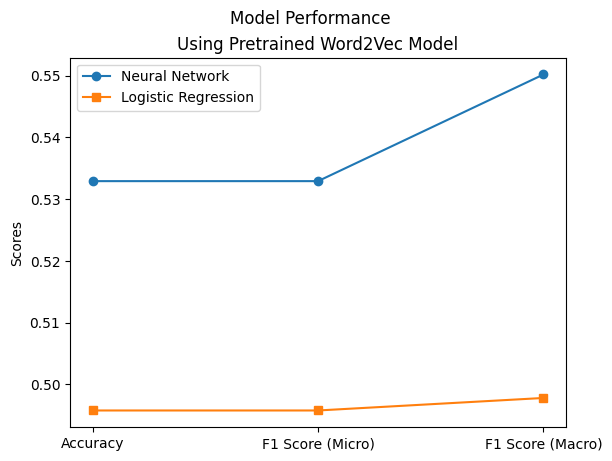

In [22]:
# compare the classifiers
compare_classifiers(accuracy_nn, accuracy_lr, f1_micro_nn, f1_micro_lr, f1_macro_nn, f1_macro_lr)


import matplotlib.pyplot as plt

# put all the scores in seperate lists for both the models
metrics = ['Accuracy', 'F1 Score (Micro)', 'F1 Score (Macro)']
log_reg_scores = [accuracy_lr, f1_micro_lr, f1_macro_lr]
neural_network_scores = [accuracy_nn, f1_micro_nn, f1_macro_nn]

# Plotting a line graph using matplotlib.pyplot
plt.plot(metrics, neural_network_scores, marker='o', label='Neural Network')
plt.plot(metrics, log_reg_scores, marker='s', label='Logistic Regression')

# Adding custom labels, title, suptitle
plt.ylabel('Scores')
plt.title('Using Pretrained Word2Vec Model')
plt.suptitle('Model Performance')
plt.legend()

plt.show()

## Problem 3 POS for classification

Robots and chat bots receive different commands to do certain tasks.

Write a simple pragram that receive interactions in the form of a sentence and return:
* A tuple of (command, object) (eg. (Grab, book)) if the sentence is a command
* None if the sentence is not a command

To write this function, you can utilize a Part-of-speech tagger or named-entity recognizer from libraries like NLTK and Spacy.

Consider the following EXAMPLE sentences:

* Commands:
  * Grab the book
  * Fetch the ball
  * Open the jar
  

* Not commands:
  * Hey, how is it going?
  * How is your day today?
  * Do you like the weather?

This list is not exhaustive, your function should be able to handle more cases.

Expected outcome:

1. A function that performs the task
2. Test the function with the above provided (Commands / Not Commands) examples and print the output  

In [ ]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

def Extract_Command(sentence):
  """
  Extracts the command and object from an input sentence.

  Input:
    sentence: string - a sentence which might be a command.
  Output:
    tuple: (command, object)- returns a tuple containing the command (verb)
            and the object if the sentence is a command.
    None - returns None if the sentence is not a command.

  """
  # Process the given sentence using spacy
  # to obtain linguistic annotations
  sentence = nlp(sentence)

  # Check if the first token is an imperative verb
  # logic to find command
  # sentence[0].pos_ checks if the part-of-speech of the first word is a verb
  # sentence[0].tag_ checks if the specific tag is 'VB',
  # which indicates the base form of the verb (imperative form)
  if sentence[0].pos_ == "VERB" and sentence[0].tag_ == "VB":

    # Find the direct object of the verb logic to find object
    # Iterate through all tokens in the sentence to find the direct object
    # - token.dep_ checks if the dependency label of the token is 'dobj' (direct object)
    for token in sentence:
      if token.dep_ == "dobj":
        # Return a tuple containing the command (verb) and the object
        return (sentence[0].text, token.text)

    # Return None, if the sentence is not a command
    return None


In [ ]:
# Test the function with the provided example sentences
example_sentences = [
    "Grab the book",
    "Fetch the ball",
    "Open the jar",
    "Hey, how is it going?",
    "How is your day today?",
    "Do you like the weather?"
]

for sentence in example_sentences:
    result = Extract_Command(sentence)
    print(f"Sentence: '{sentence}'")
    print(f"Result: {result}\n")

Sentence: 'Grab the book'
Result: ('Grab', 'book')

Sentence: 'Fetch the ball'
Result: ('Fetch', 'ball')

Sentence: 'Open the jar'
Result: ('Open', 'jar')

Sentence: 'Hey, how is it going?'
Result: None

Sentence: 'How is your day today?'
Result: None

Sentence: 'Do you like the weather?'
Result: None

